In [22]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [23]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape images to (28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [24]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 46s 47ms/step - loss: 0.2467 - accuracy: 0.9239 - val_loss: 0.0617 - val_accuracy: 0.9795
Epoch 2/10
938/938 [==============================] - 46s 49ms/step - loss: 0.0887 - accuracy: 0.9740 - val_loss: 0.0439 - val_accuracy: 0.9858
Epoch 3/10
938/938 [==============================] - 52s 55ms/step - loss: 0.0646 - accuracy: 0.9807 - val_loss: 0.0350 - val_accuracy: 0.9881
Epoch 4/10
938/938 [==============================] - 42s 45ms/step - loss: 0.0530 - accuracy: 0.9843 - val_loss: 0.0313 - val_accuracy: 0.9888
Epoch 5/10
938/938 [==============================] - 44s 47ms/step - loss: 0.0436 - accuracy: 0.9864 - val_loss: 0.0301 - val_accuracy: 0.9905
Epoch 6/10
938/938 [==============================] - 47s 50ms/step - loss: 0.0367 - accuracy: 0.9889 - val_loss: 0.0306 - val_accuracy: 0.9904
Epoch 7/10
938/938 [==============================] - 48s 52ms/step - loss: 0.0327 - accuracy: 0.9897 - val_loss: 0.0281 - val_accuracy:

In [29]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 2s 5ms/step - loss: 0.0282 - accuracy: 0.9914
Test accuracy: 99.14%


1/1 [==============================] - 0s 34ms/step


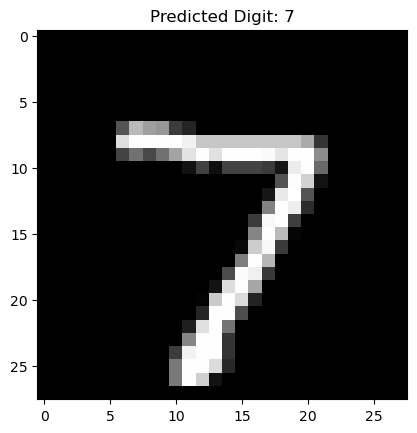

In [30]:
import numpy as np

# Choose a test image
index = 0  # Change this to the index of the image you want to test
test_image = x_test[index]

# Make a prediction
predicted_digit = np.argmax(model.predict(test_image.reshape(1, 28, 28, 1)))

# Display the test image and the predicted digit
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Digit: {predicted_digit}')
plt.show()

In [ ]:
import tkinter as tk
from tkinter import Canvas, Button

def recognize_digit():
    canvas.postscript(file="canvas.eps", colormode="color")
    img = Image.open("canvas.eps")
    img = img.resize((28, 28))
    img = img.convert("L")
    img = np.array(img)
    img = 255 - img
    img = img.reshape(1, 28, 28)
    img = img / 255.0
    result = model.predict(img)
    digit = np.argmax(result)
    label.config(text=f"Predicted Digit: {digit}")

# Create a simple UI
root = tk.Tk()
root.title("Digit Recognition")

canvas = Canvas(root, width=280, height=280, bg='white')
canvas.pack()

label = tk.Label(root, text="Draw a digit and click Recognize")
label.pack()

button = Button(root, text="Recognize", command=recognize_digit)
button.pack()

root.mainloop()

In [ ]:
import tkinter as tk
from tkinter import Canvas, Button

def recognize_digit():
    canvas.postscript(file="canvas.eps", colormode="color")
    img = Image.open("canvas.eps")
    img = img.resize((28, 28))
    img = img.convert("L")
    img = np.array(img)
    img = 255 - img
    img = img.reshape(1, 28, 28)
    img = img / 255.0
    result = model.predict(img)
    digit = np.argmax(result)
    label.config(text=f"Predicted Digit: {digit}")

# Create a simple UI
root = tk.Tk()
root.title("Digit Recognition")

canvas = Canvas(root, width=280, height=280, bg='white')
canvas.pack()

label = tk.Label(root, text="Draw a digit and click Recognize")
label.pack()

button = Button(root, text="Recognize", command=recognize_digit)
button.pack()

root.mainloop()